# KMeans clustering

[KMeans clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters. KMeans requires K as an input and does not learn it from the data.

Contrary to supervised learning where we have the ground to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric that can be used to evaluate the outcome of different clustering algorithms.

Sometimes domain knowledge and intuition can help in choosing K. Otherwise, a cluster-predict methodology can be used to evaluate how well the models are performing based on different K clusters. There are two metrics that may give some intuition about K: Elbow method and Silhouette analysis.

* [Importing libraries and packages](#importing)
* [Set paths](#set-paths)
* [Loading data](#loading-data)
* [Elbow method](#elbow)
* [Silhouette analysis](#silhouette)
* [Clustering with K=3](#three-clusters)
* [Cluster analysis](#cluster-analysis)
* [Static world map](#world-map1)
* [Clustering conclusions](#conclusions-clustering)

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Warnings
import warnings

# mathematical operations and data manipulation
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot

# kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf

warnings.filterwarnings("ignore")

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "../datasets"
# Path to assets directory (for saving results to)
assets_path = "../assets"

<a id="loading-data"></a>
## Loading data

In [3]:
# Original set
data_country = pd.read_csv(f"{data_path}/Country-data.csv")
# Shape of the dataset
print("Shape of the Country dataset: ", data_country.shape)
data_country.head()

Shape of the Country dataset:  (167, 10)


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# Scaled set
df_standard = pd.read_csv(f"{data_path}/Country-data-scaled.csv")
# Shape of the dataset
print("Shape of the Country dataset: ", df_standard.shape)
df_standard.head()

Shape of the Country dataset:  (167, 9)


child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [5]:
# Four principal components set
data2 = pd.read_csv(f"{data_path}/Country-data-components.csv")
# Shape of the dataset
print("Shape of the Country dataset: ", data2.shape)
data2.head()

Shape of the Country dataset:  (167, 4)


PC1       PC2       PC3       PC4
0 -2.913025  0.095621 -0.718118  1.005255
1  0.429911 -0.588156 -0.333486 -1.161059
2 -0.285225 -0.455174  1.221505 -0.868115
3 -2.932423  1.695555  1.525044  0.839625
4  1.033576  0.136659 -0.225721 -0.847063

In [6]:
# Geopanda's naturalearth_lowres dataset
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# Shape of the dataset
print("Shape of the Geodata dataset: ", world.shape)
world.head()

Shape of the Geodata dataset:  (177, 6)


pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<a id="elbow"></a>
### Elbow method

The elbow method is used to find the “elbow” point, where adding additional data samples does not change cluster membership much.

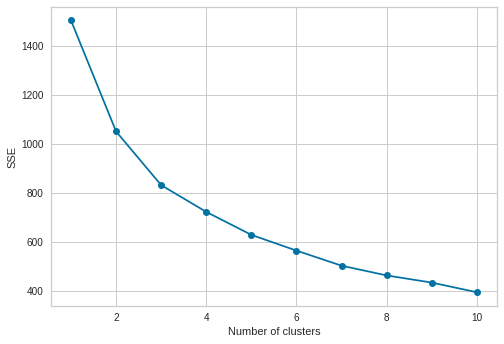

In [7]:
# calculate Sum of Squared Errors (SSE), also called distorsions,
# for a range of number of cluster - with df scaled with StandardScaler

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init="random",
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0,
    )
    km.fit(df_standard)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

<a id="silhouette"></a>
### Silhouette analysis

Silhouette score determines whether there are large gaps between each sample and all other samples within the same cluster or across different clusters.

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

We can use YellowBrick – a machine learning visualization library to draw the silhouette plots and do comparative analysis.

In [8]:
# calculate Silhoutte Score - stardardised
# noinspection PyUnboundLocalVariable
score = silhouette_score(df_standard, km.labels_, metric="euclidean")
print("Silhouette Score: %.3f" % score)

Silhouette Score: 0.202


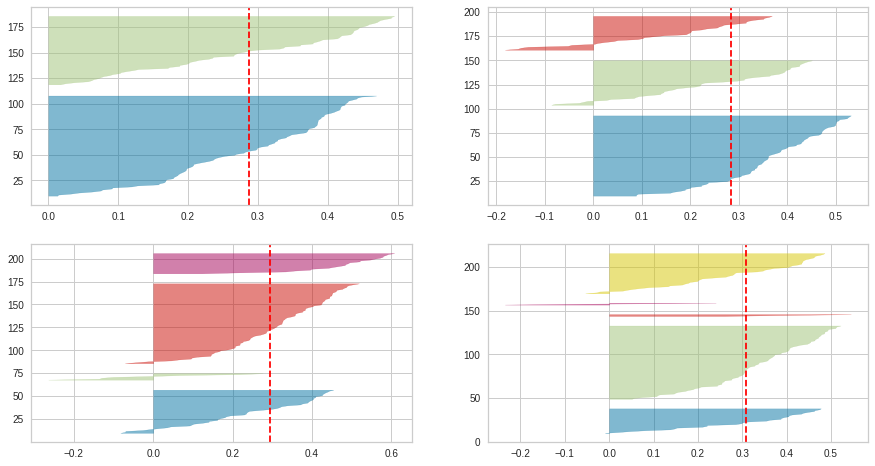

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i in [2, 3, 4, 5]:
    # KMeans instance for different numbers of clusters
    km = KMeans(
        n_clusters=i, init="random", n_init=10, max_iter=300, random_state=0
    )
    q, mod = divmod(i, 2)

    # Visualizer
    visualizer = SilhouetteVisualizer(
        km, colors="yellowbrick", ax=ax[q - 1][mod]
    )
    visualizer.fit(df_standard)

<a id="three-clusters"></a>
### Clustering with K=3

In [10]:
# For the other parameters defaults are used
km = KMeans(n_clusters=3, init="random", random_state=0)

# With df_standard, the original dataset with standard scaling
y_predicted_standard = km.fit_predict(df_standard)
print(y_predicted_standard)

[1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [11]:
# Add the cluster column to the standard dataframe
df_standard["cluster"] = y_predicted_standard
df_standard.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  cluster  
0   1.902882 -0.679180        1  
1  -0.859973 -0.485623        0  
2  -0.038404 -0.465376        0  
3   2.128151 -0.516268        1  
4  -0.541946 -0.041817        0

In [12]:
# With data2, the original dataset with standard scaling and 4 principal
# components found with the PCA method to compute the clusters and
# assign the labels
y_predicted_data2 = km.fit_predict(data2)
print(y_predicted_data2)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 1 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [13]:
# Add the cluster column to the data2 dataframe
data2["cluster"] = y_predicted_data2
data2.head()

PC1       PC2       PC3       PC4  cluster
0 -2.913025  0.095621 -0.718118  1.005255        1
1  0.429911 -0.588156 -0.333486 -1.161059        0
2 -0.285225 -0.455174  1.221505 -0.868115        0
3 -2.932423  1.695555  1.525044  0.839625        1
4  1.033576  0.136659 -0.225721 -0.847063        0

<a id="cluster-analysis"></a>
### Cluster analysis

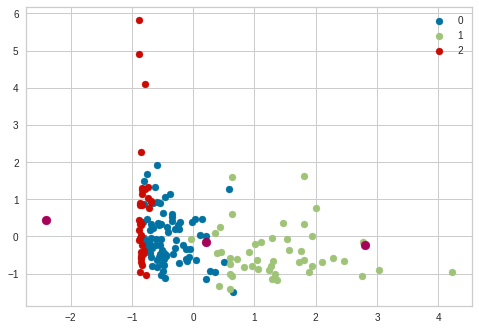

In [14]:
# Plot all KMeans clusters and the cluster centroids of the df_standard
# clustering
centroids = km.cluster_centers_
unique_labels = np.unique(y_predicted_standard)

for i in unique_labels:
    plt.scatter(
        df_standard.iloc[y_predicted_standard == i, 0],
        df_standard.iloc[y_predicted_standard == i, 1],
        label=i,
    )
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, cmap="black")
plt.legend()
plt.show()

Text(0.5, 0.98, 'Pair Plot of Clusters by Feature')

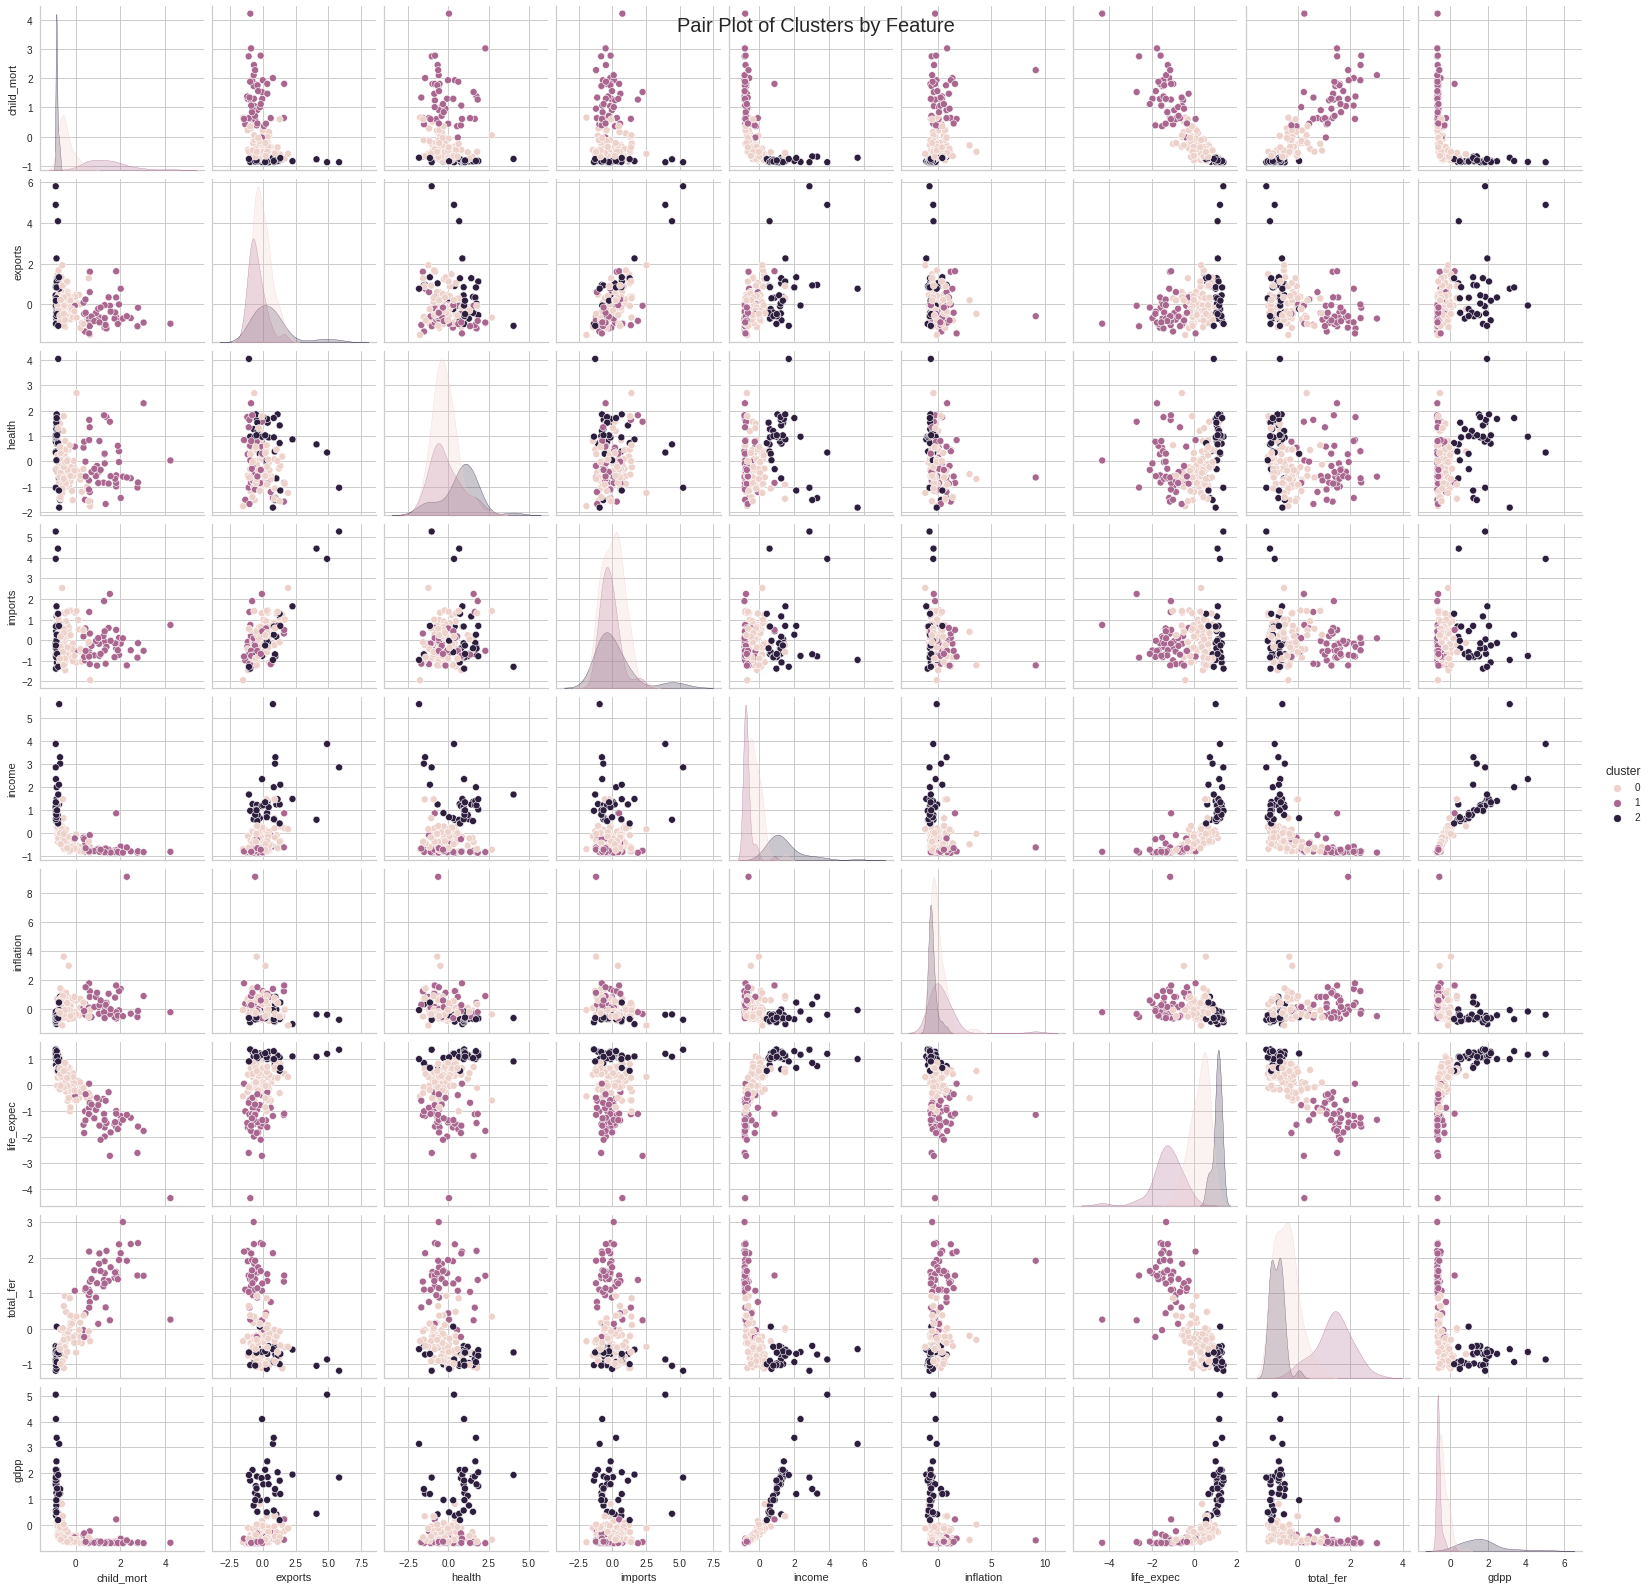

In [15]:
# Pairplot
sns.pairplot(df_standard, hue="cluster")

# title
plt.suptitle("Pair Plot of Clusters by Feature", size=20)

In [16]:
# Add cluster column to original dataset with countries and non-scaled values
data_country["cluster"] = y_predicted_standard.tolist()
data_country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        1  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        0

Text(0.5, 0.98, 'Pair Plot of Clusters by Feature')

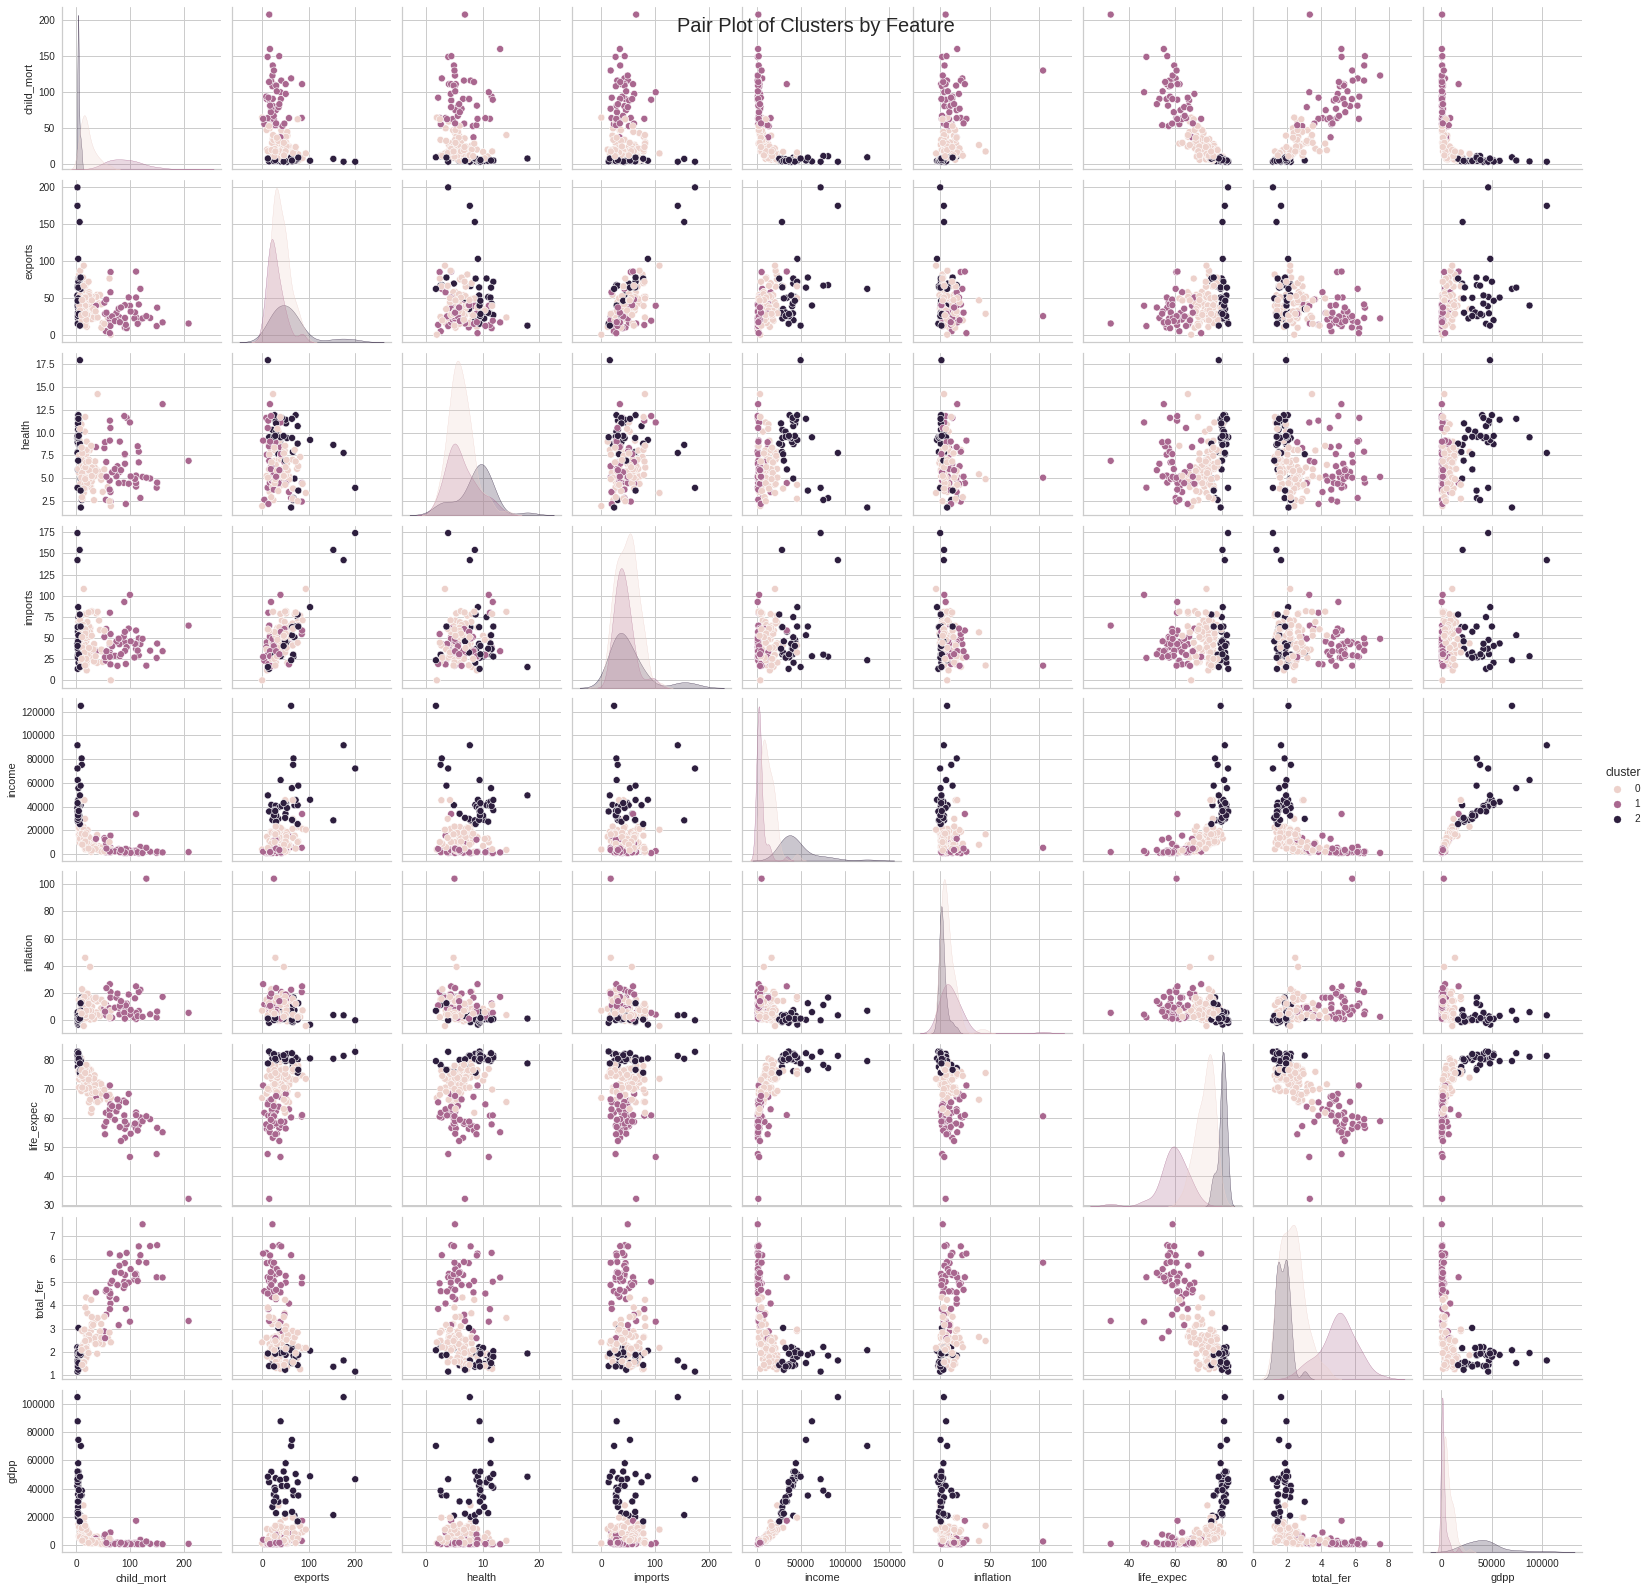

In [17]:
# Pairplot
sns.pairplot(data_country, hue="cluster")

# title
plt.suptitle("Pair Plot of Clusters by Feature", size=20)

In [18]:
# table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(data_country, index=["cluster"])
clusters_table

child_mort    exports          gdpp    health    imports  \
cluster                                                             
0         21.927381  40.243917   6486.452381  6.200952  47.473404   
1         92.961702  29.151277   1922.382979  6.388511  42.323404   
2          5.000000  58.738889  42494.444444  8.807778  51.491667   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        12305.595238   7.600905   72.814286   2.307500  
1         3942.404255  12.019681   59.187234   5.008085  
2        45672.222222   2.671250   80.127778   1.752778

In [19]:
# Cluster 0
cluster_0 = data_country.loc[data_country["cluster"] == 0]
cluster_0.to_csv(f"{data_path}/cluster_0.csv", index=False)

# List of countries in this cluster
print(cluster_0.country.unique())

['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia'
 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives'
 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Serbia'
 'Seychelles' 'Solomon Islands' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']


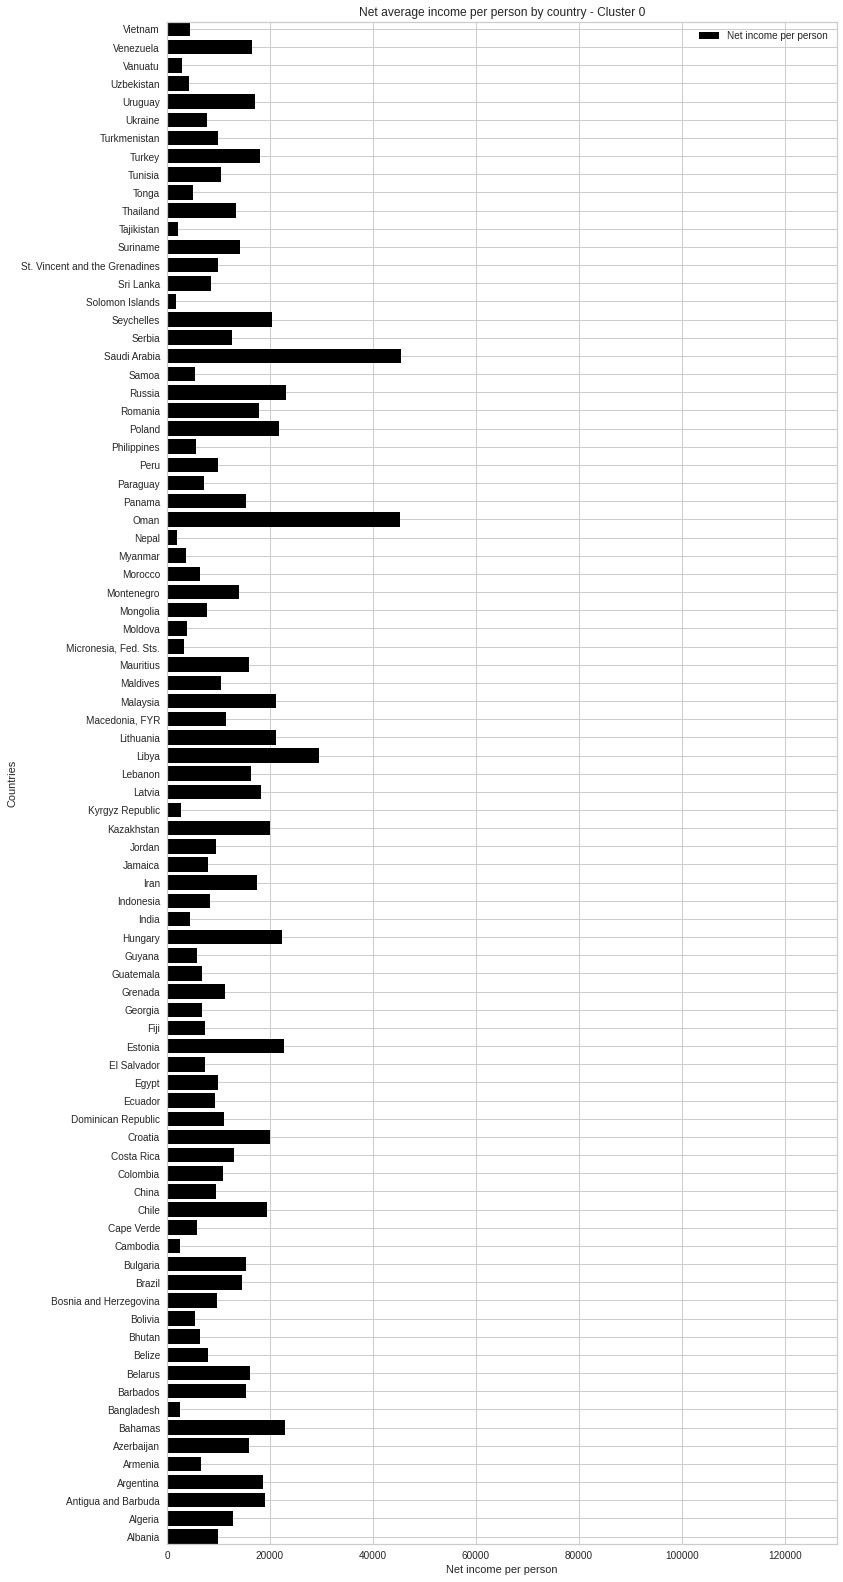

In [20]:
# Width, height
plt.figure(figsize=(12, 28))
# For comparison puposes set barscale to that of cluster 2
plt.xlim(0, 130000)
# Margins
plt.margins(0)
# For creating horizontal bars, append 'h' to the bar function name
plt.barh(
    cluster_0["country"],
    cluster_0["income"],
    label="Net income per person",
    color="black",
)
# Legends
plt.legend()
# Namimg x-axis and y-axis
plt.xlabel("Net income per person")
plt.ylabel("Countries")
# Title
plt.title("Net average income per person by country - Cluster 0")

# Plot
plt.savefig(f"{assets_path}/plot0_income.png", bbox_inches="tight", dpi=300)
plt.show()

In [21]:
# Cluster 1
cluster_1 = data_country.loc[data_country["cluster"] == 1]
cluster_1.to_csv(f"{data_path}/cluster_1.csv", index=False)

# List of countries in this cluster
print(cluster_1.country.unique())

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']


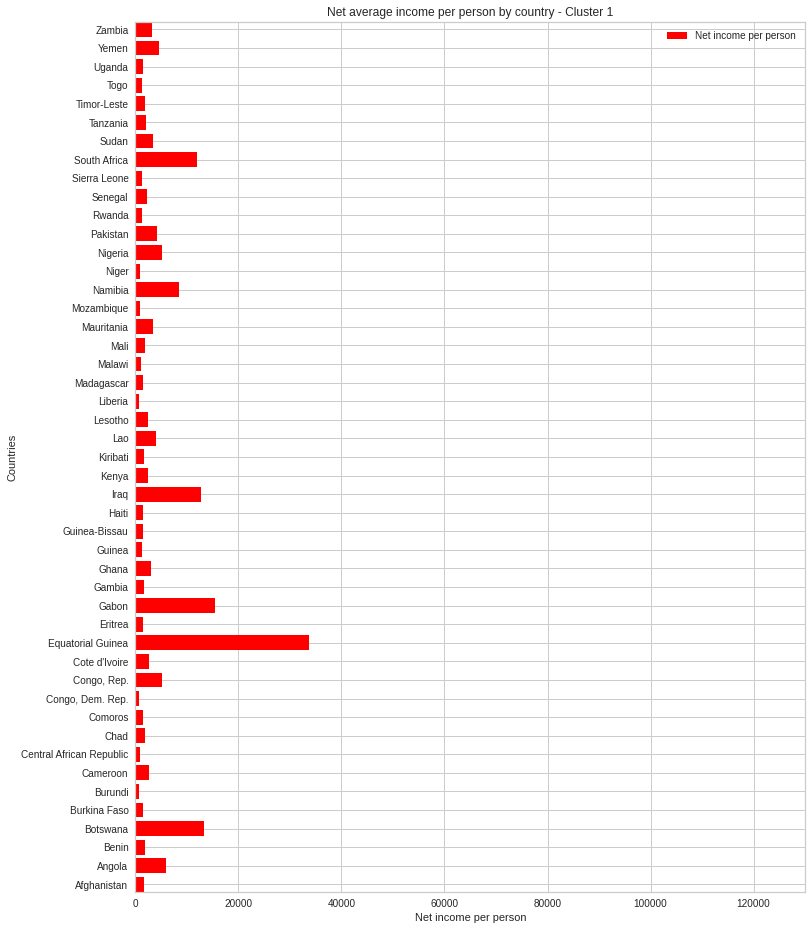

In [22]:
# Width, height
plt.figure(figsize=(12, 16))
# For comparison puposes set barscale to that of cluster 2
plt.xlim(0, 130000)
# Margins
plt.margins(0)
# For creating horizontal bars, append 'h' to the bar function name
plt.barh(
    cluster_1["country"],
    cluster_1["income"],
    label="Net income per person",
    color="red",
)
# Legends
plt.legend()
# Namimg x-axis and y-axis
plt.xlabel("Net income per person")
plt.ylabel("Countries")
# Title
plt.title("Net average income per person by country - Cluster 1")

# Plot
plt.savefig(f"{assets_path}/plot1_income.png", bbox_inches="tight", dpi=300)
plt.show()

In [23]:
# Cluster 2
cluster_2 = data_country.loc[data_country["cluster"] == 2]

# List of countries in this country
print(cluster_2.country.unique())

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']


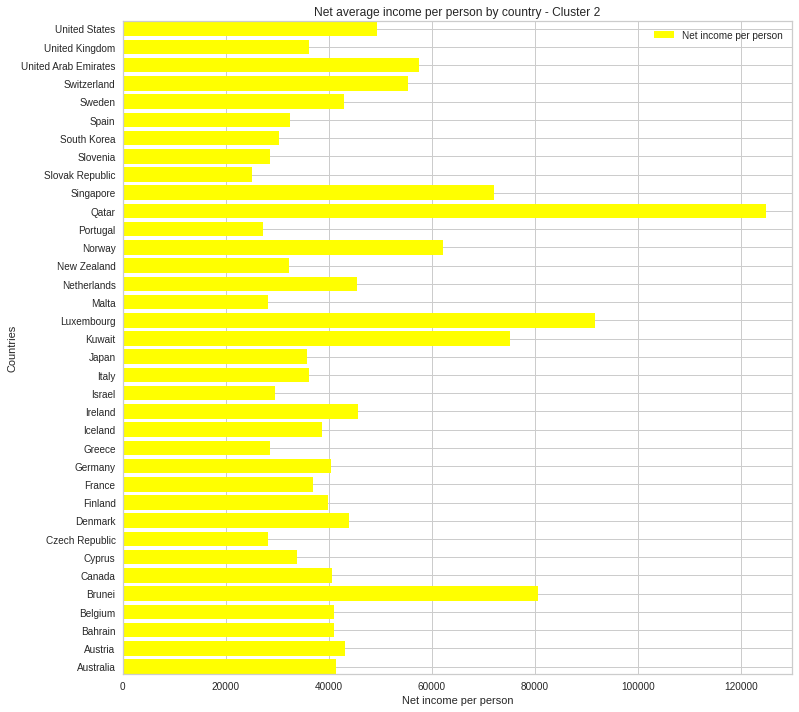

In [24]:
# Width, height
plt.figure(figsize=(12, 12))
# For comparison puposes set barscale to that of cluster 2
plt.xlim(0, 130000)
# Margins
plt.margins(0)
# For creating horizontal bars, append 'h' to the bar function name
plt.barh(
    cluster_2["country"],
    cluster_2["income"],
    label="Net income per person",
    color="yellow",
)
# Legends
plt.legend()
# Namimg x-axis and y-axis
plt.xlabel("Net income per person")
plt.ylabel("Countries")
# Title
plt.title("Net average income per person by country - Cluster 2")

# Plot
plt.savefig(f"{assets_path}/plot2_income.png", bbox_inches="tight", dpi=300)
plt.show()

<a id="world-map1"></a>
### First static world map

In [25]:
# Get country names from gpd list
world_list = sorted(world["name"].unique())
print(world_list)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [26]:
# country names for in data_country
data_list = sorted(data_country["country"].unique())
print(data_list)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwa

In [27]:
list_difference = []
for item in world_list:
    if item not in data_list:
        list_difference.append(item)
print(list_difference)

['Antarctica', 'Bosnia and Herz.', 'Central African Rep.', 'Congo', 'Cuba', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Djibouti', 'Dominican Rep.', 'Eq. Guinea', 'Ethiopia', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Greenland', 'Honduras', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Macedonia', 'Mexico', 'N. Cyprus', 'New Caledonia', 'Nicaragua', 'North Korea', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'Somalia', 'Somaliland', 'Syria', 'Taiwan', 'Trinidad and Tobago', 'United States of America', 'W. Sahara', 'Zimbabwe', 'eSwatini']


In [28]:
# Replace names in world gdp dataset with country names from
# data_country dataset
world["name"] = world["name"].replace(
    [
        "Bosnia and Herz.",
        "Central African Rep.",
        "Congo",
        "Côte d'Ivoire",
        "Dem. Rep. Congo",
        "Dominican Rep.",
        "Eq. Guinea",
        "Kyrgyzstan",
        "Laos",
        "Macedonia",
        "N. Cyprus",
        "S. Sudan",
        "Slovakia",
        "Solomon Is.",
        "United States of America",
    ],
    [
        "Bosnia and Herzegovina",
        "Central African Republic",
        "Congo, Rep.",
        "Cote d'Ivoire",
        "Congo, Dem. Rep.",
        "Dominican Republic",
        "Equatorial Guinea",
        "Kyrgyz Republic",
        "Lao",
        "Macedonia, FYR",
        "Cyprus",
        "Sudan",
        "Slovak Republic",
        "Solomon Islands",
        "United States",
    ],
)

In [29]:
# Check
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States',
       'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia',
       'Argentina', 'Chile', 'Congo, Dem. Rep.', 'Somalia', 'Kenya',
       'Sudan', 'Chad', 'Haiti', 'Dominican Republic', 'Russia',
       'Bahamas', 'Falkland Is.', 'Norway', 'Greenland',
       'Fr. S. Antarctic Lands', 'Timor-Leste', 'South Africa', 'Lesotho',
       'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia',
       'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador',
       'Guatemala', 'Belize', 'Venezuela', 'Guyana', 'Suriname', 'France',
       'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe',
       'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin',
       'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Cote d'Ivoire",
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone',
       'Burkina Faso', 'Central African Republic', 'Congo, Rep.', 'Gabon',
       'Equatorial Guinea', 'Zambia', '

In [30]:
# Change column name also
world_copy = world.copy()
world_copy.rename(columns={"name": "country"}, inplace=True)
world_copy.head()

pop_est      continent        country iso_a3  gdp_md_est  \
0     920938        Oceania           Fiji    FJI      8374.0   
1   53950935         Africa       Tanzania    TZA    150600.0   
2     603253         Africa      W. Sahara    ESH       906.5   
3   35623680  North America         Canada    CAN   1674000.0   
4  326625791  North America  United States    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [31]:
# append geodataframe data with data_combined data
world_data = data_country.merge(world_copy, on="country", how="inner")

In [32]:
# convert df into geodf
world_data = gdf(world_data)

In [33]:
world_data.to_csv(f"{data_path}/world_data_gdf.csv", index=False)

In [34]:
cluster = world_data["cluster"]

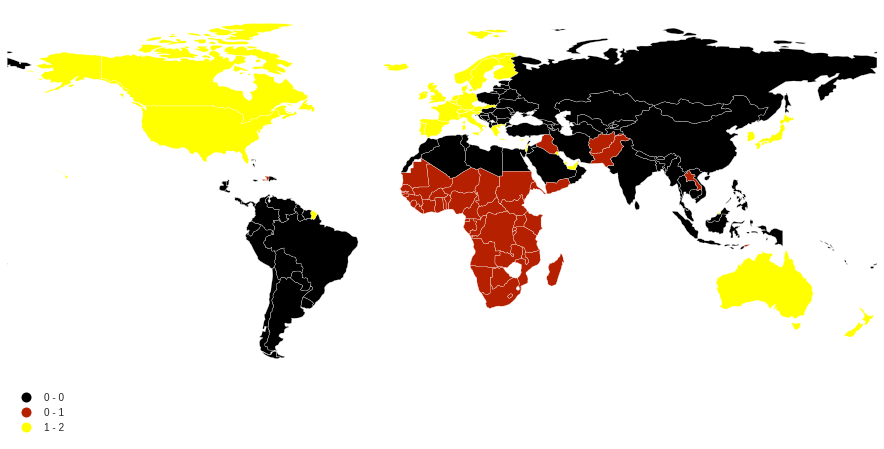

In [35]:
# Note: this code sample requires geoplot>=0.4.0.
ax = geoplot.choropleth(
    world_data,
    hue="cluster",
    cmap="gnuplot",
    figsize=(16, 8),
    edgecolor="white",
    legend=True,
)

In [36]:
ax.figure.savefig(
    f"{assets_path}/world_map1.png", bbox_inches="tight", dpi=600
)

<a id="conclusions-clustering"></a>
### Clustering conclusions

- Cluster 0 is doing averages all around.
- Cluster 1 has the highest child mortality rate, the least exports and imports, the lowest GDP, extremely low incomes, highest inflation, lowest life expectancy, and the highest age_fertility  rate of 5 children per woman (number of children that would be born to each woman if the current age-fertility rates remain the same).
- Countries in Cluster 1 are located across Africa and Asia.
- Cluster 2 is doing extremely well with the lowest child mortality, the highest exports and imports, highest gdpp (by a lot), a higher health, significantly higher incomes, the lowest inflation, the highest life expectancy and the lowest age-fertility rate of 1 child per woman (number of children that would be born to each woman if the current age-fertility rates remain the same)
- Note: Health in cluster 0 is lower than health in cluster 1. Very odd.